# **Space X  Falcon 9 First Stage Landing Prediction**

## Contents

- <a href=#Loadthedataset>Load the data set</a>
- <a href=#Addlandingpadinformation>Add landing pad information</a>
- <a href=#Analysedata>Analyse data</a>
  * <a href=#AnalysedataDate>Date</a>
  * <a href=#AnalysedataBoosterVersion>BoosterVersion</a>
  * <a href=#AnalysedataPayloadMass>PayloadMass</a>
  * <a href=#AnalysedataOrbit>Orbit</a>
  * <a href=#AnalysedataLaunchSite>LaunchSite</a>
  * <a href=#AnalysedataOutcome>Outcome</a>
  * <a href=#AnalysedataFlights>Flights</a>
  * <a href=#AnalysedataGridFins>GridFins</a>
  * <a href=#AnalysedataReused>Reused</a>
  * <a href=#AnalysedataLegs>Legs</a>
  * <a href=#AnalysedataLandingPad>LandingPad</a>
  * <a href=#AnalysedataBlock>Block</a>
  * <a href=#AnalysedataReusedCount>ReusedCount</a>
  * <a href=#AnalysedataSerial>Serial</a>
- <a href=#Launchsitesandlandingpads>Launch sites and landing pads</a>
- <a href=#Selectdataformodelling>Select data for modelling</a>
  * <a href=#SelectdataformodellingVariables>Variables</a>
- <a href=#Createdataset>Create dataset</a>
- <a href=#CreateY>Create Y</a>
- <a href=#CreateandtransformX>Create and transform X</a>
- <a href=#Splittrainingandtestingdata>Split training and testing data</a>
- <a href=#Initializeresultmatrix>Initialize result matrix</a>
- <a href=#Logisticregression>Logistic regression</a>
- <a href=#Supportvectormachine>Support vector machine</a>
- <a href=#Decesiontree>Decesion tree</a>
- <a href=#KNN>KNN</a>
- <a href=#Finaldecision>Final decision</a>

Import required packages

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.tree as sktree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Define function to plot the confusion matrix


In [2]:
def plot_confusion_matrix(cm):
    "this function plots the confusion matrix"
    ax = plt.subplot()
    sns.heatmap(cm, annot = True, ax = ax);
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title("Confusion Matrix"); 
    ax.xaxis.set_ticklabels(["Did not land", "Landed"]); ax.yaxis.set_ticklabels(["Did not land", "Landed"]) 
    plt.show() 

## Load the data set <a id = "Loadthedataset"> </a>

Load the oiginal data set - Class values are only avaiable here


In [3]:
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
orig_data = pd.read_csv(url1)

In [4]:
orig_data.to_csv("C:/Zita/___Letoltesek/___melo/python/_capstone/orig_data.csv", index = False)

In [5]:
orig_data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [7]:
type(orig_data.loc[0, "Date"])

str

In [8]:
orig_data["Class_name"] = orig_data["Class"].copy().replace({0: "Failure", 1: "Success"})
orig_data["GridFins_name"] = orig_data["GridFins"].copy().replace({False: "Not Used", True: "Used"})
orig_data["Reused_name"] = orig_data["Reused"].copy().replace({False: "Not Reused", True: "Reused"})
orig_data["Legs_name"] = orig_data["Legs"].copy().replace({False: "Not Used", True: "Used"})
orig_data["Year"] = orig_data["Date"].copy().str.slice(0, 4).astype(int)
orig_data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,...,ReusedCount,Serial,Longitude,Latitude,Class,Class_name,GridFins_name,Reused_name,Legs_name,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,...,0,B0003,-80.577366,28.561857,0,Failure,Not Used,Not Reused,Not Used,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,...,0,B0005,-80.577366,28.561857,0,Failure,Not Used,Not Reused,Not Used,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,...,0,B0007,-80.577366,28.561857,0,Failure,Not Used,Not Reused,Not Used,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,...,0,B1003,-120.610829,34.632093,0,Failure,Not Used,Not Reused,Not Used,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,...,0,B1004,-80.577366,28.561857,0,Failure,Not Used,Not Reused,Not Used,2013


In [9]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

## Add landing pad information <a id = "Addlandingpadinformation"> </a>

In [10]:
url2 = "https://api.spacexdata.com/v4/landpads"
response = requests.get(url2)
response.status_code

200

In [11]:
data_landpads = pd.json_normalize(response.json())
data_landpads.head(1)

,name,full_name,status,type,locality,region,latitude,longitude,landing_attempts,landing_successes,wikipedia,details,launches,id,images.large
0,LZ-1,Landing Zone 1,active,RTLS,Cape Canaveral,Florida,28.485833,-80.544444,21,20,https://en.wikipedia.org/wiki/Landing_Zones_1_...,SpaceX's first east coast landing pad is Landi...,"[5eb87cefffd86e000604b342, 5eb87cf9ffd86e00060...",5e9e3032383ecb267a34e7c7,[https://i.imgur.com/KHBk6jO.png]


In [12]:
orig_data = orig_data.merge(data_landpads[["id", "name", "latitude", "longitude"]], how = "left", left_on = "LandingPad", right_on = "id", suffixes = ("", "_lp"))
orig_data.shape

(90, 27)

In [13]:
orig_data.drop(columns = ["id", "LandingPad"], inplace = True)
orig_data.head(1)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,...,Latitude,Class,Class_name,GridFins_name,Reused_name,Legs_name,Year,name,latitude,longitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,...,28.561857,0,Failure,Not Used,Not Reused,Not Used,2010,NaN,NaN,NaN


In [14]:
orig_data.rename(columns = {"Latitude": "LatitudeLS", "Longitude": "LongitudeLS", "name": "LandingPad", "latitude": "LatitudeLP", "longitude": "LongitudeLP"}, inplace = True)
orig_data.head(1)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,...,LatitudeLS,Class,Class_name,GridFins_name,Reused_name,Legs_name,Year,LandingPad,LatitudeLP,LongitudeLP
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,...,28.561857,0,Failure,Not Used,Not Reused,Not Used,2010,NaN,NaN,NaN


## Analyse data <a id = "Analysedata"> </a>

### Date <a id = "AnalysedataDate"> </a>

In [15]:
orig_data[["Date"]].isnull().sum(), orig_data[["Year"]].isnull().sum()

(Date    0
 dtype: int64,
 Year    0
 dtype: int64)

In [16]:
orig_data["Year"].min(), orig_data["Year"].max()

(2010, 2020)

In [17]:
orig_data_year = orig_data.groupby(["Year", "Class_name"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).reset_index()
# no need for ordering as line charts are not stacked
orig_data_year.head()

,Year,Class_name,Number_of_flights
0,2010,Failure,1
1,2012,Failure,1
2,2013,Failure,3
3,2014,Failure,4
4,2014,Success,2


In [18]:
px.line(orig_data_year,
        x = "Year",
        y = "Number_of_flights",
        color = "Class_name",
        title = "Launch Outcomes by Year",
        labels = {"Year": "Year",
                  "Number_of_flights": "Number of launches by outcome",
                  "Class_name": "Launch outcome"},
        width = 900,
        height = 400,
        color_discrete_map = {"Failure": "#DE1A24", "Success": "#0ED633"}).update_xaxes(tickmode = "array", tickvals = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

### BoosterVersion <a id = "AnalysedataBoosterVersion"> </a>

In [19]:
orig_data[["BoosterVersion"]].value_counts(dropna = False)

BoosterVersion
Falcon 9          90
Name: count, dtype: int64

### PayloadMass <a id = "AnalysedataPayloadMass"> </a>

In [20]:
orig_data[["PayloadMass"]].isnull().sum()

PayloadMass    0
dtype: int64

In [21]:
orig_data_pm = orig_data.sort_values(["Class_name", "PayloadMass"], ascending = [False, True])
# no need for grouping as histogram charts automatically group

In [22]:
px.histogram(orig_data_pm,
             x = "PayloadMass",
             color = "Class_name",
             title = "Launch Outcomes by Payload Mass (stacked)",
             labels = {"PayloadMass": "Payload Mass",
                       "Class_name": "Launch outcome"},
             nbins = 10,
             width = 700,
             height = 400,
             color_discrete_map = {"Failure": "#DE1A24", "Success": "#0ED633"}).update_layout(yaxis_title = "Number of launches by outcome")


In [23]:
px.box(orig_data,
       x = "Year",
       y = "PayloadMass",
       title = "Payload Mass Statistics by Year",
       labels = {"Year": "Year",
                 "PayloadMass": "Payload Mass"},
       width = 900,
       height = 400).update_xaxes(tickmode = "array", tickvals = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

### Orbit <a id = "AnalysedataOrbit"> </a>

In [24]:
orig_data[["Orbit"]].value_counts(dropna = False)

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
GEO       1
HEO       1
SO        1
Name: count, dtype: int64

In [25]:
orig_data_orbit = orig_data.groupby(["Orbit", "Class_name"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).sort_values(["Class_name", "Orbit"], ascending = [False, True]).reset_index()
orig_data_orbit.head()

,Orbit,Class_name,Number_of_flights
0,ES-L1,Success,1
1,GEO,Success,1
2,GTO,Success,14
3,HEO,Success,1
4,ISS,Success,13


In [26]:
px.bar(orig_data_orbit,
       x = "Orbit",
       y = "Number_of_flights",
       color = "Class_name",
       title = "Launch Outcomes by Orbit (stacked)",
       labels = {"Orbit": "Orbit",
                 "Number_of_flights": "Number of launches by outcome",
                 "Class_name": "Launch outcome"},
       width = 700,
       height = 400,
       color_discrete_map = {"Failure": "#DE1A24", "Success": "#0ED633"}).update_xaxes(categoryorder = "category ascending")

In [27]:
orig_data_orbit_date = orig_data.groupby(["Orbit", "Year"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).reset_index()
orig_data_orbit_date.head()

,Orbit,Year,Number_of_flights
0,ES-L1,2015,1
1,GEO,2020,1
2,GTO,2013,1
3,GTO,2014,3
4,GTO,2015,1


In [28]:
px.bar(orig_data_orbit_date,
       x = "Year",
       y = "Number_of_flights",
       color = "Orbit",
       title = "Orbit Usage by Date",
       labels = {"Date": "Launch Date",
                 "Number_of_flights": "Number of launches",
                 "Orbit": "Orbit"},
       barmode = "group",
       width = 900,
       height = 500).update_xaxes(tickmode = "array", tickvals = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

### LaunchSite <a id = "AnalysedataLaunchSite"> </a>

In [29]:
orig_data[["LaunchSite"]].value_counts(dropna = False)

LaunchSite  
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [30]:
orig_data_launchsite = orig_data.groupby(["LaunchSite", "Class_name"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).sort_values(["Class_name", "LaunchSite"], ascending = [False, True]).reset_index()
orig_data_launchsite

,LaunchSite,Class_name,Number_of_flights
0,CCAFS SLC 40,Success,33
1,KSC LC 39A,Success,17
2,VAFB SLC 4E,Success,10
3,CCAFS SLC 40,Failure,22
4,KSC LC 39A,Failure,5
5,VAFB SLC 4E,Failure,3


In [31]:
px.bar(orig_data_launchsite,
       x = "LaunchSite",
       y = "Number_of_flights",
       color = "Class_name",
       title = "Launch Outcomes by Launch Site (stacked)",
       labels = {"LaunchSite": "Launch Site",
                 "Number_of_flights": "Number of launches by outcome",
                 "Class_name": "Launch outcome"},
       width = 500,
       height = 400,
       color_discrete_map = {"Failure": "#DE1A24", "Success": "#0ED633"}).update_xaxes(categoryorder = "category ascending").update_traces(width = 0.3)

In [32]:
orig_data_launchsite_date = orig_data.groupby(["LaunchSite", "Year"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).reset_index()
orig_data_launchsite_date.head()

,LaunchSite,Year,Number_of_flights
0,CCAFS SLC 40,2010,1
1,CCAFS SLC 40,2012,1
2,CCAFS SLC 40,2013,2
3,CCAFS SLC 40,2014,6
4,CCAFS SLC 40,2015,6


In [33]:
px.line(orig_data_launchsite_date,
        x = "Year",
        y = "Number_of_flights",
        color = "LaunchSite",
        title = "Launch Site Usage by Date",
        labels = {"Date": "Launch Date",
                  "Number_of_flights": "Number of launches",
                  "LaunchSite": "Launch Site"},
        width = 900,
        height = 400)

### Outcome <a id = "AnalysedataOutcome"> </a>

In [34]:
orig_data.groupby(["Outcome", "Class_name"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).reset_index()

,Outcome,Class_name,Number_of_flights
0,False ASDS,Failure,6
1,False Ocean,Failure,2
2,False RTLS,Failure,1
3,None ASDS,Failure,2
4,None None,Failure,19
5,True ASDS,Success,41
6,True Ocean,Success,5
7,True RTLS,Success,14


### Flights <a id = "AnalysedataFlights"> </a>

In [35]:
orig_data[["Flights"]].value_counts(dropna = False)

Flights
1          53
2          19
3           8
4           6
5           2
6           2
Name: count, dtype: int64

In [36]:
orig_data_flights = orig_data.groupby(["Flights", "Class_name"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).sort_values(["Class_name", "Flights"], ascending = [False, True]).reset_index()
orig_data_flights.head()

,Flights,Class_name,Number_of_flights
0,1,Success,31
1,2,Success,15
2,3,Success,7
3,4,Success,4
4,5,Success,1


In [37]:
px.bar(orig_data_flights,
       x = "Flights",
       y = "Number_of_flights",
       color = "Class_name",
       title = "Launch Outcomes by Number of Flights (stacked)",
       labels = {"Flights": "Number of Flights",
                 "Number_of_flights": "Number of launches by outcome",
                 "Class_name": "Launch outcome"},
       width = 600,
       height = 400,
       color_discrete_map = {"Failure": "#DE1A24", "Success": "#0ED633"}).update_xaxes(type = "category", categoryorder = "category ascending").update_traces(width = 0.5)

### GridFins <a id = "AnalysedataGridFins"> </a>

In [38]:
orig_data[["GridFins"]].value_counts(dropna = False)

GridFins
True        70
False       20
Name: count, dtype: int64

In [39]:
orig_data_gridfins = orig_data.groupby(["GridFins_name", "Class_name"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).sort_values(["Class_name", "GridFins_name"], ascending = [False, True]).reset_index()
orig_data_gridfins.head()

,GridFins_name,Class_name,Number_of_flights
0,Not Used,Success,2
1,Used,Success,58
2,Not Used,Failure,18
3,Used,Failure,12


In [40]:
px.bar(orig_data_gridfins,
       x = "GridFins_name",
       y = "Number_of_flights",
       color = "Class_name",
       title = "Launch Outcomes by Grid Fins (stacked)",
       labels = {"GridFins_name": "Grid Fins",
                 "Number_of_flights": "Number of launches by outcome",
                 "Class_name": "Launch outcome"},
       width = 500,
       height = 400,
       color_discrete_map = {"Failure": "#DE1A24", "Success": "#0ED633"}).update_xaxes(categoryorder = "category ascending").update_traces(width = 0.3)

In [41]:
orig_data_gridfins_date = orig_data.groupby(["GridFins_name", "Year"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).reset_index()
orig_data_gridfins_date.head()

,GridFins_name,Year,Number_of_flights
0,Not Used,2010,1
1,Not Used,2012,1
2,Not Used,2013,3
3,Not Used,2014,6
4,Not Used,2015,1


In [42]:
px.line(orig_data_gridfins_date,
        x = "Year",
        y = "Number_of_flights",
        color = "GridFins_name",
        title = "Grid Fin Usage by Date",
        labels = {"Date": "Launch Date",
                  "Number_of_flights": "Number of launches",
                  "GridFins_name": "Grid Fin Usage"},
        width = 900,
        height = 400).update_xaxes(tickmode = "array", tickvals = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

### Reused <a id = "AnalysedataReused"> </a>

In [43]:
orig_data[["Reused"]].value_counts(dropna = False)

Reused
False     53
True      37
Name: count, dtype: int64

In [44]:
orig_data_reused = orig_data.groupby(["Reused_name", "Class_name"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).sort_values(["Class_name", "Reused_name"], ascending = [False, True]).reset_index()
orig_data_reused.head()

,Reused_name,Class_name,Number_of_flights
0,Not Reused,Success,31
1,Reused,Success,29
2,Not Reused,Failure,22
3,Reused,Failure,8


In [45]:
px.bar(orig_data_reused,
       x = "Reused_name",
       y = "Number_of_flights",
       color = "Class_name",
       title = "Launch Outcomes by Reused (stacked)",
       labels = {"Reused_name": "Reused",
                 "Number_of_flights": "Number of launches by outcome",
                 "Class_name": "Launch outcome"},
       width = 500,
       height = 400,
       color_discrete_map = {"Failure": "#DE1A24", "Success": "#0ED633"}).update_xaxes(categoryorder = "category ascending").update_traces(width = 0.3)

### Legs <a id = "AnalysedataLegs"> </a>

In [46]:
orig_data[["Legs"]].value_counts(dropna = False)

Legs 
True     71
False    19
Name: count, dtype: int64

In [47]:
orig_data_legs = orig_data.groupby(["Legs_name", "Class_name"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).sort_values(["Class_name", "Legs_name"], ascending = [False, True]).reset_index()
orig_data_legs.head()

,Legs_name,Class_name,Number_of_flights
0,Not Used,Success,1
1,Used,Success,59
2,Not Used,Failure,18
3,Used,Failure,12


In [48]:
px.bar(orig_data_legs,
       x = "Legs_name",
       y = "Number_of_flights",
       color = "Class_name",
       title = "Launch Outcomes by Leg Usage (stacked)",
       labels = {"Legs_name": "Legs",
                 "Number_of_flights": "Number of launches by outcome",
                 "Class_name": "Launch outcome"},
       width = 500,
       height = 400,
       color_discrete_map = {"Failure": "#DE1A24", "Success": "#0ED633"}).update_xaxes(categoryorder = "category ascending").update_traces(width = 0.3)

In [49]:
orig_data_legs_date = orig_data.groupby(["Legs_name", "Year"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).reset_index()
orig_data_legs_date.head()

,Legs_name,Year,Number_of_flights
0,Not Used,2010,1
1,Not Used,2012,1
2,Not Used,2013,3
3,Not Used,2014,4
4,Not Used,2015,1


In [50]:
px.line(orig_data_legs_date,
        x = "Year",
        y = "Number_of_flights",
        color = "Legs_name",
        title = "Leg Usage by Date",
        labels = {"Date": "Launch Date",
                  "Number_of_flights": "Number of launches",
                  "Legs_name": "Leg Usage"},
        width = 900,
        height = 400).update_xaxes(tickmode = "array", tickvals = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

### LandingPad <a id = "AnalysedataLandingPad"> </a>

In [51]:
orig_data.groupby(["Outcome", "LandingPad"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).reset_index()

,Outcome,LandingPad,Number_of_flights
0,False ASDS,JRTI,1
1,False ASDS,JRTI-1,2
2,False ASDS,OCISLY,3
3,False Ocean,NaN,2
4,False RTLS,LZ-1,1
5,None ASDS,OCISLY,2
6,None None,NaN,19
7,True ASDS,JRTI,11
8,True ASDS,OCISLY,30
9,True Ocean,NaN,5


In [52]:
orig_data[["LandingPad"]].value_counts(dropna = False)

LandingPad
OCISLY        35
NaN           26
LZ-1          13
JRTI          12
JRTI-1         2
LZ-4           2
Name: count, dtype: int64

In [53]:
orig_data_landingpad = orig_data.groupby(["LandingPad", "Class_name"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).sort_values(["Class_name", "LandingPad"], ascending = [False, True]).reset_index()
orig_data_landingpad["LandingPad"] = orig_data_landingpad["LandingPad"].copy().replace({np.NaN: "None (Ocean)"})
orig_data_landingpad.head(10)

,LandingPad,Class_name,Number_of_flights
0,JRTI,Success,11
1,LZ-1,Success,12
2,LZ-4,Success,2
3,OCISLY,Success,30
4,None (Ocean),Success,5
5,JRTI,Failure,1
6,JRTI-1,Failure,2
7,LZ-1,Failure,1
8,OCISLY,Failure,5
9,None (Ocean),Failure,21


In [54]:
px.bar(orig_data_landingpad,
       x = "LandingPad",
       y = "Number_of_flights",
       color = "Class_name",
       title = "Launch Outcomes by Landing Pad (stacked)",
       labels = {"LandingPad": "Landing Pad",
                 "Number_of_flights": "Number of launches by outcome",
                 "Class_name": "Launch outcome"},
       width = 700,
       height = 400,
       color_discrete_map = {"Failure": "#DE1A24", "Success": "#0ED633"}).update_xaxes(categoryorder = "category ascending").update_traces(width = 0.3)

In [55]:
orig_data_landingpad_date = orig_data.groupby(["LandingPad", "Year"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).reset_index()
orig_data_landingpad_date["LandingPad"] = orig_data_landingpad_date["LandingPad"].copy().replace({np.NaN: "None (Ocean)"})
orig_data_landingpad_date.head()

,LandingPad,Year,Number_of_flights
0,JRTI,2016,1
1,JRTI,2017,4
2,JRTI,2018,2
3,JRTI,2019,1
4,JRTI,2020,4


In [56]:
px.bar(orig_data_landingpad_date,
       x = "Year",
       y = "Number_of_flights",
       color = "LandingPad",
       barmode = "group",
       title = "Landing Pad Usage by Date",
       labels = {"Date": "Launch Date",
                 "Number_of_flights": "Number of launches",
                 "LandingPad": "Landing Pad"},
       width = 1100,
       height = 400).update_xaxes(tickmode = "array", tickvals = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

### Block <a id = "AnalysedataBlock"> </a>

In [57]:
orig_data[["Block"]].value_counts(dropna = False)

Block
5.0      39
1.0      19
3.0      15
4.0      11
2.0       6
Name: count, dtype: int64

In [58]:
orig_data_block = orig_data.groupby(["Block", "Class_name"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).sort_values(["Class_name", "Block"], ascending = [False, True]).reset_index()
orig_data_block.head()

,Block,Class_name,Number_of_flights
0,1.0,Success,4
1,2.0,Success,6
2,3.0,Success,11
3,4.0,Success,6
4,5.0,Success,33


In [59]:
px.bar(orig_data_block,
       x = "Block",
       y = "Number_of_flights",
       color = "Class_name",
       title = "Launch Outcomes by Block (stacked)",
       labels = {"Block": "Block",
                 "Number_of_flights": "Number of launches by outcome",
                 "Class_name": "Launch outcome"},
       width = 600,
       height = 400,
       color_discrete_map = {"Failure": "#DE1A24", "Success": "#0ED633"}).update_xaxes(type = "category", categoryorder = "category ascending")

### ReusedCount <a id = "AnalysedataReusedCount"> </a>

In [60]:
orig_data[["ReusedCount"]].value_counts(dropna = False)

ReusedCount
0              30
1              24
3              12
5              11
2               9
4               4
Name: count, dtype: int64

In [61]:
orig_data_reusedcount = orig_data.groupby(["ReusedCount", "Class_name"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).sort_values(["Class_name", "ReusedCount"], ascending = [False, True]).reset_index()
orig_data_reusedcount.head()

,ReusedCount,Class_name,Number_of_flights
0,0,Success,8
1,1,Success,20
2,2,Success,8
3,3,Success,10
4,4,Success,3


In [62]:
px.bar(orig_data_reusedcount,
       x = "ReusedCount",
       y = "Number_of_flights",
       color = "Class_name",
       title = "Launch Outcomes by Reused Count (stacked)",
       labels = {"ReusedCount": "Reused Count",
                 "Number_of_flights": "Number of launches by outcome",
                 "Class_name": "Launch outcome"},
       width = 600,
       height = 400,
       color_discrete_map = {"Failure": "#DE1A24", "Success": "#0ED633"}).update_xaxes(type = "category", categoryorder = "category ascending")

### Serial <a id = "AnalysedataSerial"> </a>

In [63]:
orig_data[["Serial"]].value_counts(dropna = False)

Serial
B1049     6
B1051     5
B1048     4
B1059     4
B1056     4
B1046     4
B1060     3
B1058     3
B1047     3
B1035     2
B1021     2
B1040     2
B1041     2
B1036     2
B1031     2
B1032     2
B1045     2
B1029     2
B1039     2
B1037     1
B1034     1
B0003     1
B1038     1
B1042     1
B1043     1
B1050     1
B1054     1
B1044     1
B1030     1
B0005     1
B1028     1
B0007     1
B1003     1
B1004     1
B1005     1
B1006     1
B1007     1
B1008     1
B1010     1
B1011     1
B1012     1
B1013     1
B1015     1
B1016     1
B1017     1
B1018     1
B1019     1
B1020     1
B1022     1
B1023     1
B1025     1
B1026     1
B1062     1
Name: count, dtype: int64

In [64]:
orig_data_serial = orig_data.groupby(["Serial", "Class_name"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).sort_values(["Class_name", "Serial"], ascending = [False, True]).reset_index()
orig_data_serial.head()

,Serial,Class_name,Number_of_flights
0,B1006,Success,1
1,B1007,Success,1
2,B1013,Success,1
3,B1019,Success,1
4,B1021,Success,2


In [65]:
px.bar(orig_data_serial,
       x = "Serial",
       y = "Number_of_flights",
       color = "Class_name",
       title = "Launch Outcomes by Serial (stacked)",
       labels = {"Serial": "Serial",
                 "Number_of_flights": "Number of launches by outcome",
                 "Class_name": "Launch outcome"},
       width = 1200,
       height = 400,
       color_discrete_map = {"Failure": "#DE1A24", "Success": "#0ED633"}).update_xaxes(categoryorder = "category ascending")

## Launch sites and landing pads <a id = "Launchsitesandlandingpads"> </a>

In [66]:
orig_data_corr_launchsite_landingpad = orig_data.groupby(["Class_name", "LaunchSite", "LatitudeLS", "LongitudeLS", "LandingPad", "LatitudeLP", "LongitudeLP"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count")).sort_values(["Class_name", "LaunchSite", "LandingPad"], ascending = [False, True, True]).reset_index()
orig_data_corr_launchsite_landingpad["LandingPad"] = orig_data_corr_launchsite_landingpad["LandingPad"].copy().replace({np.NaN: "None (Ocean)"})
orig_data_corr_launchsite_landingpad.head()

,Class_name,LaunchSite,LatitudeLS,LongitudeLS,LandingPad,LatitudeLP,LongitudeLP,Number_of_flights
0,Success,CCAFS SLC 40,28.561857,-80.577366,JRTI,28.410400,-80.618800,4
1,Success,CCAFS SLC 40,28.561857,-80.577366,LZ-1,28.485833,-80.544444,7
2,Success,CCAFS SLC 40,28.561857,-80.577366,OCISLY,33.729186,-118.262015,18
3,Success,CCAFS SLC 40,28.561857,-80.577366,None (Ocean),NaN,NaN,4
4,Success,KSC LC 39A,28.608058,-80.603956,LZ-1,28.485833,-80.544444,5


In [67]:
px.scatter(orig_data_corr_launchsite_landingpad,
          x = "LaunchSite",
          y = "LandingPad",
          color = "Class_name",
          size = "Number_of_flights",
          title = "Launch Outcomes by Launch Site and Landing Pad",
          labels = {"LaunchSite": "Launch Site",
                    "LandingPad": "Landing Pad",
                    "Class_name": "Launch outcome"},
       width = 900,
       height = 400,
       color_discrete_map = {"Failure": "#DE1A24", "Success": "#0ED633"}).update_xaxes(categoryorder = "category ascending").update_yaxes(categoryorder = "category ascending")

In [68]:
orig_data_launchsite_dist = orig_data.groupby(["LaunchSite", "LatitudeLS", "LongitudeLS"], dropna = False).agg(Number_of_flights = ("FlightNumber", "count"), First_date_used = ("Date", "min"), Last_date_used = ("Date", "max")).sort_values(["LaunchSite"], ascending = [True]).reset_index()
orig_data_launchsite_dist.head(10)

,LaunchSite,LatitudeLS,LongitudeLS,Number_of_flights,First_date_used,Last_date_used
0,CCAFS SLC 40,28.561857,-80.577366,55,2010-06-04,2020-11-05
1,KSC LC 39A,28.608058,-80.603956,22,2017-02-19,2020-10-18
2,VAFB SLC 4E,34.632093,-120.610829,13,2013-09-29,2019-06-12


In [69]:
orig_data_landingpad_dist = orig_data.groupby(["LandingPad", "LatitudeLP", "LongitudeLP"], dropna = True).agg(Number_of_flights = ("FlightNumber", "count"), First_date_used = ("Date", "min"), Last_date_used = ("Date", "max")).sort_values(["LandingPad"], ascending = [True]).reset_index()
orig_data_landingpad_dist.head(10)

,LandingPad,LatitudeLP,LongitudeLP,Number_of_flights,First_date_used,Last_date_used
0,JRTI,28.410400,-80.618800,12,2016-01-17,2020-10-24
1,JRTI-1,28.410400,-80.618800,2,2015-01-10,2015-04-14
2,LZ-1,28.485833,-80.544444,13,2015-12-22,2020-08-30
3,LZ-4,34.632989,-120.615167,2,2018-10-08,2019-06-12
4,OCISLY,33.729186,-118.262015,35,2015-06-28,2020-11-05


In [70]:
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location = nasa_coordinate, zoom_start = 5)

markerls = []

for i in orig_data_launchsite_dist.index:
    markerls.append(folium.map.Marker(orig_data_launchsite_dist.iloc[i, orig_data_launchsite_dist.columns.get_indexer(["LatitudeLS", "LongitudeLS"])],
                                      popup = folium.Popup("Launch Site - " + orig_data_launchsite_dist.iloc[i, orig_data_launchsite_dist.columns.get_loc("LaunchSite")]),
                                      icon = folium.Icon(color = "blue")))
    site_map.add_child(markerls[i])

markerlp = []

for j in orig_data_landingpad_dist.index:
    markerlp.append(folium.map.Marker(orig_data_landingpad_dist.iloc[j, orig_data_landingpad_dist.columns.get_indexer(["LatitudeLP", "LongitudeLP"])],
                                      popup = folium.Popup("Landing Pad - " + orig_data_landingpad_dist.iloc[j, orig_data_landingpad_dist.columns.get_loc("LandingPad")]),
                                      icon = folium.Icon(color = "green")))
    site_map.add_child(markerlp[j])

site_map

c:\Users\zitah\AppData\Local\Programs\Python\Python311\Lib\site-packages\folium\utilities.py:86: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



## Select data for modelling <a id = "Selectdataformodelling"> </a>

### Variables <a id = "SelectdataformodellingVariables"> </a>

After thorough analysis of the variables provided only a few proved to be useful for the purposes of modelling:

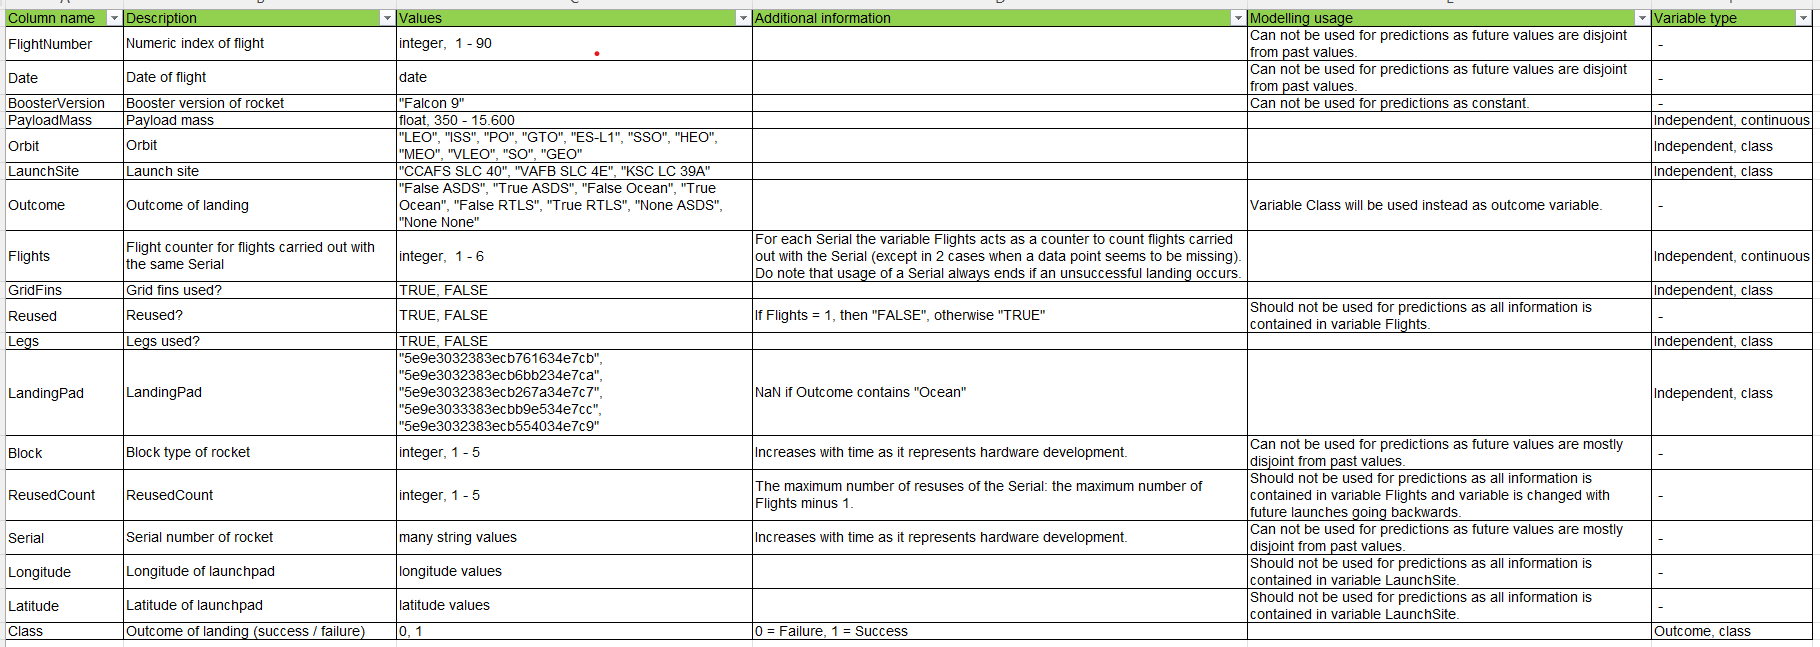

Hence I only kept useful columns.

### Base population <a id = "SelectdataformodellingBasepopulation"> </a>

As successful launches began with year 2015, I decided to leave out the launches before 2015 as they are irrelevant. Launches with landing pad JRTI-1 are also irrelevant as this landing pad was retired after 2 unsuccessful launches in early 2015, hence I decided to also discard these data points. I believe this to be a valid decision even if almost 15% of the - very small - base population is loast (13 out of 90).

## Create data set <a id = "Createdataset"> </a>

In [71]:
print(orig_data.shape)
data_filt = orig_data[(orig_data["Year"] >= 2015) & (orig_data["LandingPad"] != "JRTI-1")].reset_index(drop=True).copy().drop(columns = ["FlightNumber", "Date", "BoosterVersion", "Outcome", "Reused", "Block", "ReusedCount", "Serial", "LongitudeLS", "LatitudeLS", "LongitudeLP", "LatitudeLP", "Class_name", "GridFins_name", "Reused_name", "Legs_name", "Year"])
print(data_filt.shape)
data_filt.head()

(90, 25)
(77, 8)


,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Legs,Class,LandingPad
0,570.0,ES-L1,CCAFS SLC 40,1,True,True,1,NaN
1,4707.0,GTO,CCAFS SLC 40,1,False,False,0,NaN
2,2477.0,ISS,CCAFS SLC 40,1,True,True,0,OCISLY
3,2034.0,LEO,CCAFS SLC 40,1,True,True,1,LZ-1
4,553.0,PO,VAFB SLC 4E,1,True,True,0,JRTI


In [72]:
data_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  77 non-null     float64
 1   Orbit        77 non-null     object 
 2   LaunchSite   77 non-null     object 
 3   Flights      77 non-null     int64  
 4   GridFins     77 non-null     bool   
 5   Legs         77 non-null     bool   
 6   Class        77 non-null     int64  
 7   LandingPad   62 non-null     object 
dtypes: bool(2), float64(1), int64(2), object(3)
memory usage: 3.9+ KB


In [73]:
data_filt_dummies = pd.get_dummies(data_filt, dummy_na = True)
data_filt_dummies.head()

,PayloadMass,Flights,GridFins,Legs,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Orbit_nan,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LaunchSite_nan,LandingPad_JRTI,LandingPad_LZ-1,LandingPad_LZ-4,LandingPad_OCISLY,LandingPad_nan
0,570.0,1,True,True,1,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,4707.0,1,False,False,0,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
2,2477.0,1,True,True,0,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,2034.0,1,True,True,1,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,553.0,1,True,True,0,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [74]:
data_filt_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PayloadMass              77 non-null     float64
 1   Flights                  77 non-null     int64  
 2   GridFins                 77 non-null     bool   
 3   Legs                     77 non-null     bool   
 4   Class                    77 non-null     int64  
 5   Orbit_ES-L1              77 non-null     bool   
 6   Orbit_GEO                77 non-null     bool   
 7   Orbit_GTO                77 non-null     bool   
 8   Orbit_HEO                77 non-null     bool   
 9   Orbit_ISS                77 non-null     bool   
 10  Orbit_LEO                77 non-null     bool   
 11  Orbit_MEO                77 non-null     bool   
 12  Orbit_PO                 77 non-null     bool   
 13  Orbit_SO                 77 non-null     bool   
 14  Orbit_SSO                77 

In [75]:
data = data_filt_dummies.copy().astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PayloadMass              77 non-null     float64
 1   Flights                  77 non-null     float64
 2   GridFins                 77 non-null     float64
 3   Legs                     77 non-null     float64
 4   Class                    77 non-null     float64
 5   Orbit_ES-L1              77 non-null     float64
 6   Orbit_GEO                77 non-null     float64
 7   Orbit_GTO                77 non-null     float64
 8   Orbit_HEO                77 non-null     float64
 9   Orbit_ISS                77 non-null     float64
 10  Orbit_LEO                77 non-null     float64
 11  Orbit_MEO                77 non-null     float64
 12  Orbit_PO                 77 non-null     float64
 13  Orbit_SO                 77 non-null     float64
 14  Orbit_SSO                77 

In [76]:
data.head(5)

,PayloadMass,Flights,GridFins,Legs,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Orbit_nan,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LaunchSite_nan,LandingPad_JRTI,LandingPad_LZ-1,LandingPad_LZ-4,LandingPad_OCISLY,LandingPad_nan
0,570.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4707.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2477.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2034.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,553.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [77]:
data.index

RangeIndex(start=0, stop=77, step=1)

In [78]:
data.columns

Index(['PayloadMass', 'Flights', 'GridFins', 'Legs', 'Class', 'Orbit_ES-L1',
       'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO',
       'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO',
       'Orbit_nan', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LaunchSite_nan', 'LandingPad_JRTI',
       'LandingPad_LZ-1', 'LandingPad_LZ-4', 'LandingPad_OCISLY',
       'LandingPad_nan'],
      dtype='object')

## Create Y <a id = "CreateY"> </a>

In [79]:
y = data["Class"]

## Create and transform X <a id = "CreateandtransformX"> </a>

In [80]:
x = data.drop(columns = "Class").copy()

In [81]:
transform = preprocessing.StandardScaler()
x_scaled = pd.DataFrame(transform.fit_transform(x.values), index = x.index, columns = x.columns)
x_scaled.head()

,PayloadMass,Flights,GridFins,Legs,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,...,Orbit_nan,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LaunchSite_nan,LandingPad_JRTI,LandingPad_LZ-1,LandingPad_LZ-4,LandingPad_OCISLY,LandingPad_nan
0,-1.291290,-0.733951,0.363803,0.386334,8.717798,-0.114708,-0.652630,-0.114708,-0.512148,-0.234082,...,0.0,0.889212,-0.632456,-0.429669,0.0,-0.429669,-0.450694,-0.163299,-0.912871,2.033060
1,-0.420123,-0.733951,-2.748737,-2.588436,-0.114708,-0.114708,1.532262,-0.114708,-0.512148,-0.234082,...,0.0,0.889212,-0.632456,-0.429669,0.0,-0.429669,-0.450694,-0.163299,-0.912871,2.033060
2,-0.889715,-0.733951,0.363803,0.386334,-0.114708,-0.114708,-0.652630,-0.114708,1.952562,-0.234082,...,0.0,0.889212,-0.632456,-0.429669,0.0,-0.429669,-0.450694,-0.163299,1.095445,-0.491869
3,-0.983002,-0.733951,0.363803,0.386334,-0.114708,-0.114708,-0.652630,-0.114708,-0.512148,4.272002,...,0.0,0.889212,-0.632456,-0.429669,0.0,-0.429669,2.218801,-0.163299,-0.912871,-0.491869
4,-1.294870,-0.733951,0.363803,0.386334,-0.114708,-0.114708,-0.652630,-0.114708,-0.512148,-0.234082,...,0.0,-1.124591,-0.632456,2.327373,0.0,2.327373,-0.450694,-0.163299,-0.912871,-0.491869


## Split training and testing data <a id = "Splittrainingandtestingdata"> </a>

In [82]:
x_train, x_test, y_train, y_test, ind_train, ind_test = train_test_split(x_scaled, y, x_scaled.index, test_size = 0.2, random_state = 2)

In [83]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, ind_train.shape, ind_test.shape

((61, 25), (61,), (16, 25), (16,), (61,), (16,))

## Initialize result matrix <a id = "Initializeresultmatrix"> </a>

In [84]:
model_name = []
cv_score = []
train_score = []
train_TP = []
train_TN = []
train_FP = []
train_FN = []
test_score = []
test_TP = []
test_TN = []
test_FP = []
test_FN = []
full_score = []
full_TP = []
full_TN = []
full_FP = []
full_FN = []

## Logistic regression <a id = "Logisticregression"> </a>


In [85]:
parameters_lr = {"C": [0.01,0.1,1],
                 "penalty": ["l2"],
                 "solver": ["lbfgs"],
                 "random_state": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
lr = LogisticRegression()

In [86]:
cv_lr = GridSearchCV(lr, parameters_lr, cv = 10)
cv_lr.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'solver': ['lbfgs']})

In [87]:
best_params_lr = cv_lr.best_params_
best_score_lr = cv_lr.best_score_
print("tuned hpyerparameters (best parameters):", best_params_lr)
print("accuracy:", best_score_lr) #note that this is cross-validated score

tuned hpyerparameters (best parameters): {'C': 1, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}
accuracy: 0.8357142857142857


In [88]:
train_score_lr = cv_lr.score(x_train, y_train)
train_score_lr

0.8688524590163934

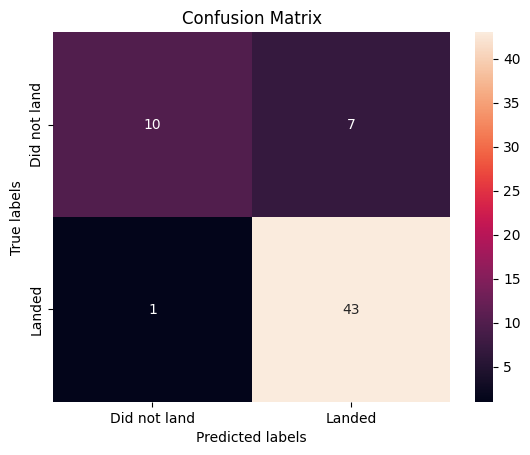

In [89]:
train_yhat_lr = cv_lr.predict(x_train)
train_cm_lr = confusion_matrix(y_train, train_yhat_lr)
plot_confusion_matrix(train_cm_lr)

In [90]:
test_score_lr = cv_lr.score(x_test, y_test)
test_score_lr

0.9375

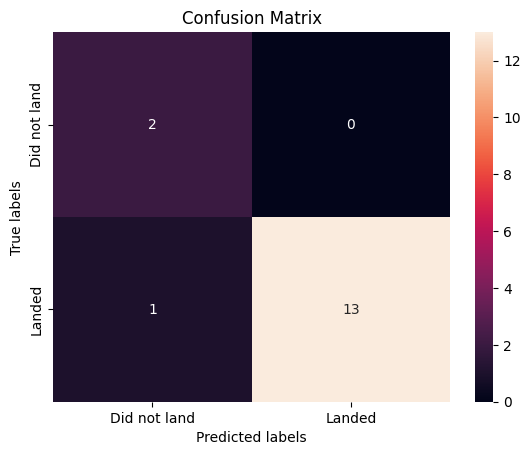

In [91]:
test_yhat_lr = cv_lr.predict(x_test)
test_cm_lr = confusion_matrix(y_test, test_yhat_lr)
plot_confusion_matrix(test_cm_lr)

In [92]:
full_score_lr = cv_lr.score(x_scaled, y)
full_score_lr

0.8831168831168831

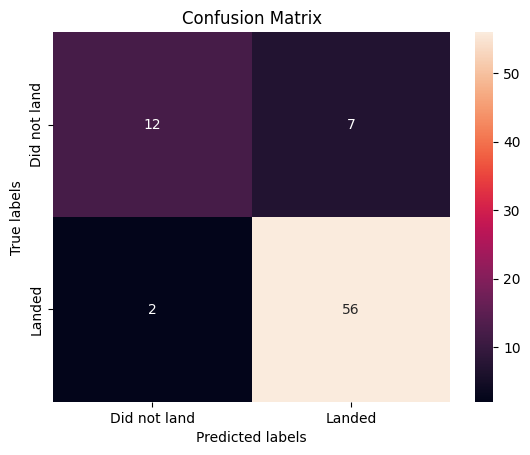

In [93]:
full_yhat_lr = cv_lr.predict(x_scaled)
full_cm_lr = confusion_matrix(y, full_yhat_lr)
plot_confusion_matrix(full_cm_lr)

In [94]:
model_name.append("Logistic regression")
cv_score.append(best_score_lr)
train_score.append(train_score_lr)
train_TP.append(train_cm_lr[1, 1])
train_TN.append(train_cm_lr[0, 0])
train_FP.append(train_cm_lr[0, 1])
train_FN.append(train_cm_lr[1, 0])
test_score.append(test_score_lr)
test_TP.append(test_cm_lr[1, 1])
test_TN.append(test_cm_lr[0, 0])
test_FP.append(test_cm_lr[0, 1])
test_FN.append(test_cm_lr[1, 0])
full_score.append(full_score_lr)
full_TP.append(full_cm_lr[1, 1])
full_TN.append(full_cm_lr[0, 0])
full_FP.append(full_cm_lr[0, 1])
full_FN.append(full_cm_lr[1, 0])

## Support vector machine <a id = "Supportvectormachine"> </a>


In [95]:
parameters_svm = {"kernel": ("linear", "rbf", "poly", "rbf", "sigmoid"),
                  "C": np.logspace(-3, 3, 5),
                  "gamma": np.logspace(-3, 3, 5),
                  "random_state": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
svm = SVC()

In [96]:
cv_svm = GridSearchCV(svm, parameters_svm, cv = 10)
cv_svm.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [97]:
best_params_svm = cv_svm.best_params_
best_score_svm = cv_svm.best_score_
print("tuned hpyerparameters (best parameters):", best_params_svm)
print("accuracy:", best_score_svm) #note that this is cross-validated score

tuned hpyerparameters (best parameters): {'C': 31.622776601683793, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid', 'random_state': 0}
accuracy: 0.8523809523809526


In [98]:
train_score_svm = cv_svm.score(x_train, y_train)
train_score_svm

0.8688524590163934

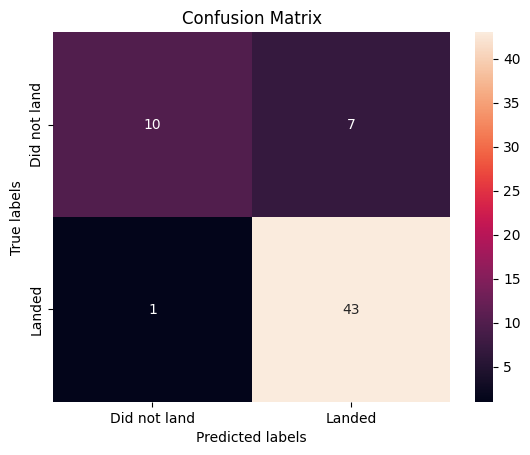

In [99]:
train_yhat_svm = cv_svm.predict(x_train)
train_cm_svm = confusion_matrix(y_train, train_yhat_svm)
plot_confusion_matrix(train_cm_svm)

In [100]:
test_score_svm = cv_svm.score(x_test, y_test)
test_score_svm

0.9375

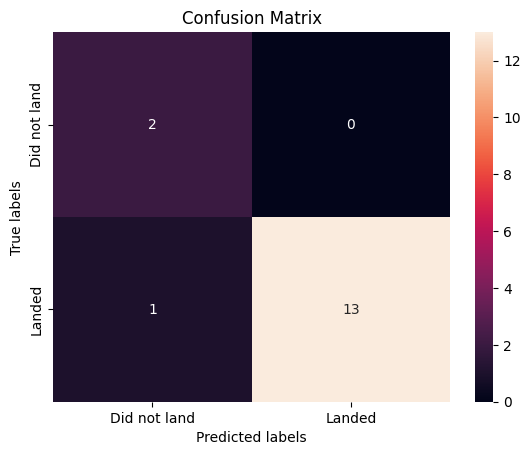

In [101]:
test_yhat_svm = cv_svm.predict(x_test)
test_cm_svm = confusion_matrix(y_test, test_yhat_svm)
plot_confusion_matrix(test_cm_svm)

In [102]:
full_score_svm = cv_svm.score(x_scaled, y)
full_score_svm

0.8831168831168831

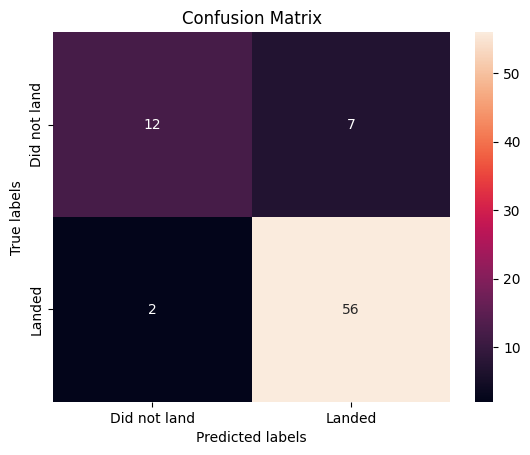

In [103]:
full_yhat_svm = cv_svm.predict(x_scaled)
full_cm_svm = confusion_matrix(y, full_yhat_svm)
plot_confusion_matrix(full_cm_svm)

In [104]:
model_name.append("SVM")
cv_score.append(best_score_svm)
train_score.append(train_score_svm)
train_TP.append(train_cm_svm[1, 1])
train_TN.append(train_cm_svm[0, 0])
train_FP.append(train_cm_svm[0, 1])
train_FN.append(train_cm_svm[1, 0])
test_score.append(test_score_svm)
test_TP.append(test_cm_svm[1, 1])
test_TN.append(test_cm_svm[0, 0])
test_FP.append(test_cm_svm[0, 1])
test_FN.append(test_cm_svm[1, 0])
full_score.append(full_score_svm)
full_TP.append(full_cm_svm[1, 1])
full_TN.append(full_cm_svm[0, 0])
full_FP.append(full_cm_svm[0, 1])
full_FN.append(full_cm_svm[1, 0])

## Decesion tree <a id = "Decesiontree"> </a>

As the training data set is very small, the decision tree algorithm is very unstabe. This means that cross validation is not meaningful in this case as for each choice of cross-validation sample (out of the 10 cross-validation sets for a fixed set of parameters) the resulting tree is very different. Averaging accuracy over these very different trees, chosing a parameter set based on this average value and then retraining the tree using this parameter set and all the training datsa most probably results in a tree that does not perform well.
Looping over the parameter values to find the best tree is still desirable hence I modified the code to do just this.

In [105]:
parameters_dt = {"criterion": ["gini", "entropy"],
                 "splitter": ["best", "random"],
                 "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
                 "max_features": ["sqrt"], #value "auto" is deprecated https://github.com/scikit-learn/scikit-learn/pull/22476
                 "min_samples_leaf": [2, 3, 4, 5],
                 "min_samples_split": [5, 6, 7, 8, 9, 10],
                 "random_state": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [106]:
dt = DecisionTreeClassifier()
best_score = 0
best_grid = {}
for g in ParameterGrid(parameters_dt):
    dt.set_params(**g)
    dt.fit(x_train, y_train)
    if dt.score(x_train, y_train) > best_score:
        best_score = dt.score(x_train, y_train)
        best_grid = g
best_score, best_grid

(0.9344262295081968,
 {'criterion': 'gini',
  'max_depth': 7,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'random_state': 4,
  'splitter': 'best'})

In [107]:
dt.set_params(**best_grid)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, random_state=4)

In [108]:
train_score_tree = dt.score(x_train, y_train)
train_score_tree

0.9344262295081968

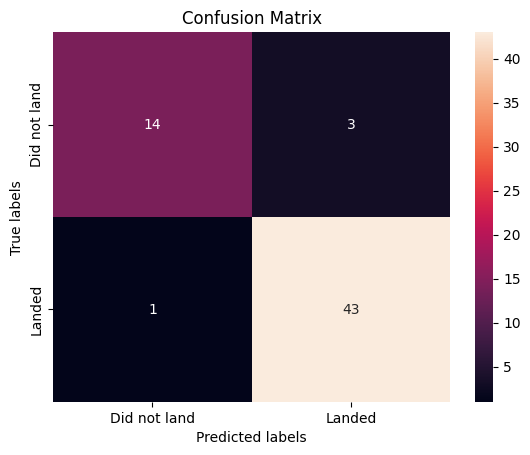

In [109]:
train_yhat_tree = dt.predict(x_train)
train_cm_tree = confusion_matrix(y_train, train_yhat_tree)
plot_confusion_matrix(train_cm_tree)

In [110]:
test_score_tree = dt.score(x_test, y_test)
test_score_tree

0.875

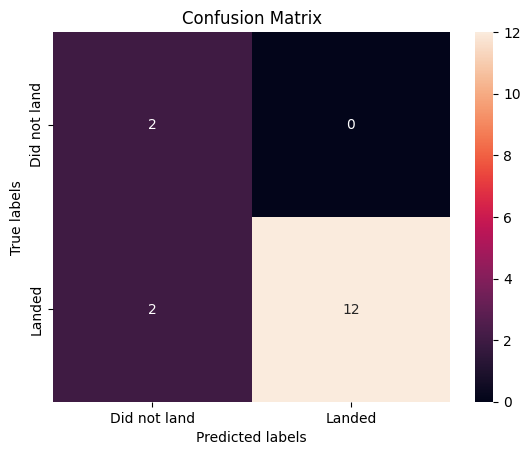

In [111]:
test_yhat_tree = dt.predict(x_test)
test_cm_tree = confusion_matrix(y_test, test_yhat_tree)
plot_confusion_matrix(test_cm_tree)

In [112]:
full_score_tree = dt.score(x_scaled, y)
full_score_tree

0.922077922077922

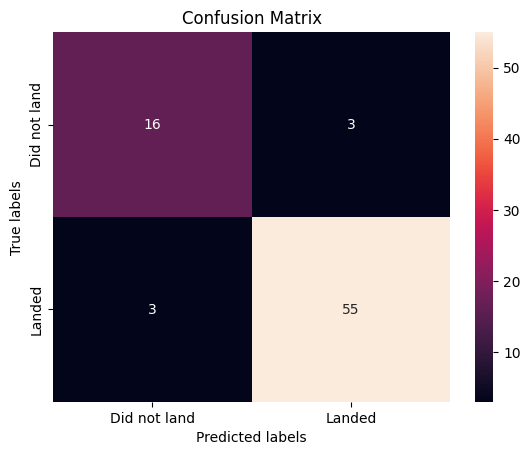

In [113]:
full_yhat_tree = dt.predict(x_scaled)
full_cm_tree = confusion_matrix(y, full_yhat_tree)
plot_confusion_matrix(full_cm_tree)

In [114]:
model_name.append("Tree")
cv_score.append(np.nan)
train_score.append(train_score_tree)
train_TP.append(train_cm_tree[1, 1])
train_TN.append(train_cm_tree[0, 0])
train_FP.append(train_cm_tree[0, 1])
train_FN.append(train_cm_tree[1, 0])
test_score.append(test_score_tree)
test_TP.append(test_cm_tree[1, 1])
test_TN.append(test_cm_tree[0, 0])
test_FP.append(test_cm_tree[0, 1])
test_FN.append(test_cm_tree[1, 0])
full_score.append(full_score_tree)
full_TP.append(full_cm_tree[1, 1])
full_TN.append(full_cm_tree[0, 0])
full_FP.append(full_cm_tree[0, 1])
full_FN.append(full_cm_tree[1, 0])

[Text(0.5, 0.9375, 'x[0] <= 0.044\ngini = 0.402\nsamples = 61\nvalue = [17, 44]'),
 Text(0.29411764705882354, 0.8125, 'x[2] <= -1.192\ngini = 0.46\nsamples = 39\nvalue = [14.0, 25.0]'),
 Text(0.23529411764705882, 0.6875, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.35294117647058826, 0.6875, 'x[13] <= 1.766\ngini = 0.342\nsamples = 32\nvalue = [7, 25]'),
 Text(0.29411764705882354, 0.5625, 'x[0] <= -0.814\ngini = 0.358\nsamples = 30\nvalue = [7, 23]'),
 Text(0.11764705882352941, 0.4375, 'x[16] <= -0.118\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.058823529411764705, 0.3125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.17647058823529413, 0.3125, 'x[8] <= 0.72\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.11764705882352941, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.23529411764705882, 0.1875, 'x[0] <= -0.913\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.17647058823529413, 0.0625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.29

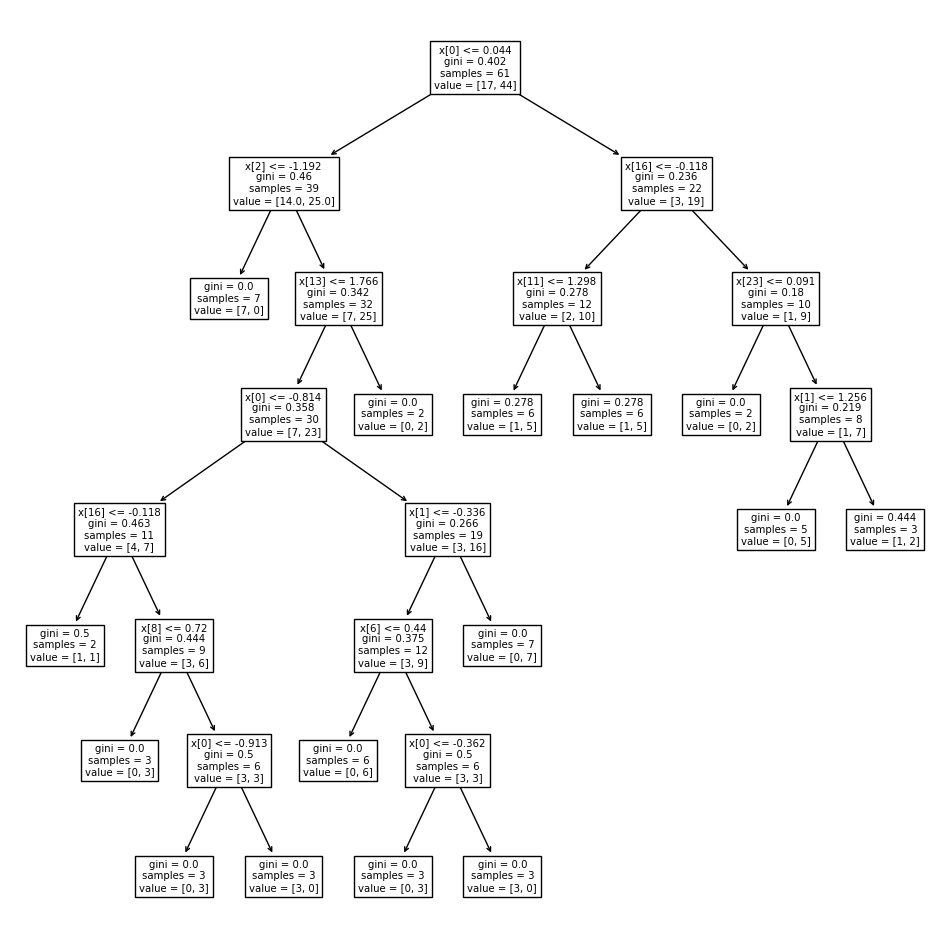

In [115]:
plt.figure(figsize = (12, 12))
sktree.plot_tree(dt)

In [116]:
data_train = data.iloc[ind_train,:]
data_train.shape

(61, 26)

## KNN <a id = "KNN"> </a>

In [117]:
parameters_knn = {"n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                  "p": [1, 2]}
KNN = KNeighborsClassifier()

In [118]:
cv_knn = GridSearchCV(KNN, parameters_knn, cv = 10)
cv_knn.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [119]:
best_params_knn = cv_knn.best_params_
best_score_knn = cv_knn.best_score_
print("tuned hpyerparameters (best parameters):", best_params_knn)
print("accuracy:", best_score_knn) #note that this is cross-validated score

tuned hpyerparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy: 0.8357142857142857


In [120]:
train_score_knn = cv_knn.score(x_train, y_train)
train_score_knn

0.8360655737704918

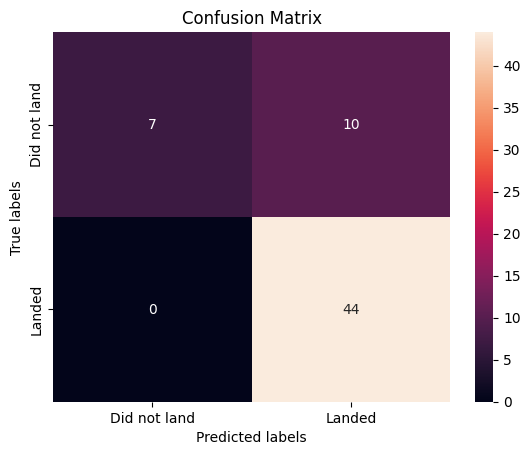

In [121]:
train_yhat_knn = cv_knn.predict(x_train)
train_cm_knn = confusion_matrix(y_train, train_yhat_knn)
plot_confusion_matrix(train_cm_knn)

In [122]:
test_score_knn = cv_knn.score(x_test, y_test)
test_score_knn

1.0

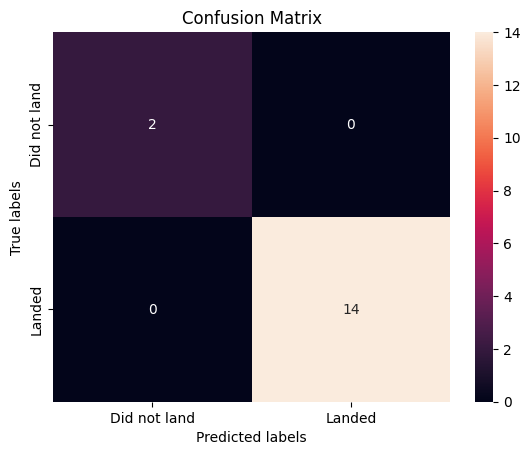

In [123]:
test_yhat_knn = cv_knn.predict(x_test)
test_cm_knn = confusion_matrix(y_test, test_yhat_knn)
plot_confusion_matrix(test_cm_knn)

In [124]:
full_score_knn = cv_knn.score(x_scaled, y)
full_score_knn

0.8701298701298701

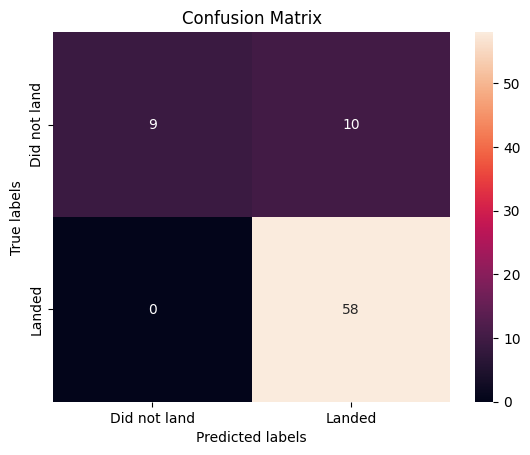

In [125]:
full_yhat_knn = cv_knn.predict(x_scaled)
full_cm_knn = confusion_matrix(y, full_yhat_knn)
plot_confusion_matrix(full_cm_knn)

In [126]:
model_name.append("KNN")
cv_score.append(best_score_knn)
train_score.append(train_score_knn)
train_TP.append(train_cm_knn[1, 1])
train_TN.append(train_cm_knn[0, 0])
train_FP.append(train_cm_knn[0, 1])
train_FN.append(train_cm_knn[1, 0])
test_score.append(test_score_knn)
test_TP.append(test_cm_knn[1, 1])
test_TN.append(test_cm_knn[0, 0])
test_FP.append(test_cm_knn[0, 1])
test_FN.append(test_cm_knn[1, 0])
full_score.append(full_score_knn)
full_TP.append(full_cm_knn[1, 1])
full_TN.append(full_cm_knn[0, 0])
full_FP.append(full_cm_knn[0, 1])
full_FN.append(full_cm_knn[1, 0])

## Final decision <a id = "Finaldecision"> </a>

In [130]:
results = pd.DataFrame({"model_name": model_name,
                        "cv_score": cv_score,
                        "train_score": train_score,
                        "train_TP": train_TP,
                        "train_TN": train_TN,
                        "train_FP": train_FP,
                        "train_FN": train_FN,
                        "test_score": test_score,
                        "test_TP": test_TP,
                        "test_TN": test_TN,
                        "test_FP": test_FP,
                        "test_FN": test_FN,
                        "full_score": full_score,
                        "full_TP": full_TP,
                        "full_TN": full_TN,
                        "full_FP": full_FP,
                        "full_FN": full_FN})
results

,model_name,cv_score,train_score,train_TP,train_TN,train_FP,train_FN,test_score,test_TP,test_TN,test_FP,test_FN,full_score,full_TP,full_TN,full_FP,full_FN
0,Logistic regression,0.835714,0.868852,43,10,7,1,0.9375,13,2,0,1,0.883117,56,12,7,2
1,SVM,0.852381,0.868852,43,10,7,1,0.9375,13,2,0,1,0.883117,56,12,7,2
2,Tree,NaN,0.934426,43,14,3,1,0.8750,12,2,0,2,0.922078,55,16,3,3
3,KNN,0.835714,0.836066,44,7,10,0,1.0000,14,2,0,0,0.870130,58,9,10,0


I find this excercise very inadequate as the sample size is very low, the features provided were not the best available, and the sole purpose of Space-X is to make past data as irrelevant as possible with new innovations constantly increasing mission success.

As the KNN algorithm provided the best accuracy on the test data and it performed relatively well on the training data I decided to use that as the final model.

I would love to hear further guidance on the exact methodology of model selection and further steps in real life. How should one choose between models with so similar outcomes on the test data? Is it really a good practice to refit the model on the full data set (train and test) once the model and the parameters have been selected? Etc, etc, etc.